# Er det mulig å skyte et legeme i bane rundt jorda, med en railgun? Og hva skal til for å få det til?

### Introduksjon: Hvordan fungerer en railgun?

En railgun er en elektrisk kanon som akselererer et prosjektil til veldig store hastigheter ved hjelp av et magnetfelt og elektrisk strøm. Railgun-en fungerer ved at to parallelle ledende skinner er koblet til en spenningskilde. Skinnene er igjen koblet sammen med en ledende bro som kan bevege seg normalt mellom de to skinnene. Strømmen går fra spenningskilden, gjennom den ene skinna, gjennom broen videre gjennom den andre skinna og tilbake til spenningskilden igjen.

# Fig 1 ill. av systemet

Strøm, eller ladninger i bevegelse, skaper et magnetfelt. Dette feltet er høyrehåndsorientert, som vist i Figur 1. Krafta som virker på broen kommer fra retningen strømmen beveger seg i og magnetfeltets retning. Fra Figur 1 kan vi se at krafta virker vinkelrett på både strømmens retning og magnetfeltet. Denne krafta vil akselerere broen langs skinnene, og det er dette vi skal bruke for å prøve å skyte et legeme i bane rundt jorda. 

### Problemstilling

Det første vi skal se på er hvordan en railgun fungerer, og hvilke hastigheter vi kan få legemer med ulike masser til å oppnå. Videre skal vi utforske hvilke størrelser som skal til for å få et legeme i bane rundt jorda. Her kommer det til å bli gjort forenklinger, blandt annet å se bort fra luftmotstand. Hvorfor kommer vi tilbake til senere. Deretter vil et nytt spørsmål melde seg: hvor stor avstand trenger vi å ha mellom skinnene, for å unngå dielektrisk gjennombrudd av strøm i lufta mellom skinnene? 

#### Railgun

Krafta på broen er gitt ved 

$$\vec{F}_b=q\vec{v}\times\vec{B}$$

hvor $\vec{B}$ er det samlede magnetfeltet fra de to skinnene, som vi kan anse som uendelig lange ledninger, dersom skinnene er veldig lange. Feltet fra *en* leder er gitt ved Ampéres lov

$$\oint_C\vec{B}\,d\vec{l}=\mu_0I$$

Fra Biot-Savarts lov

$$d\vec{B}=\frac{\mu_0}{4\pi}\frac{Id\vec{l}\times\vec{R}}{R^3}$$

ser vi at hvert bidrag må stå vinkelrett på både strømretningen og retningen vinkelrett på denne (her $\vec{R}$).

Siden vi har en uendelig lang leder, kan vi fra en symmetribetraktning se at feltet ikke kan ha noen komponent i parallell retning som hverken strømmen eller $\vec{R}$. Altså må feltet ha en komponent i azimut retning, som er avhengig av avstanden $r$ fra lederen. Vi får at 

$$\vec{B}=B_\varphi(r)\hat{\varphi}$$

Ampéres lov omhandler en lukket kurve og strømmen gjennom kurven. Kurven vi bruker er en sirkel med radius $r$. Vi får

$$\oint_CB_\varphi(r)\hat{\varphi}dl\hat{\varphi}=\mu_0I\\
B_\varphi(r)\oint_Cdl=\mu_0I\\
B_\varphi(r)\cdot2\pi r=\mu_0I\\
B_\varphi(r)=\frac{\mu_0I}{2\pi r}$$

Det neste steget er å undersøke hvilke krefter som virker på broen. Vi starter med å definere noen størrelser.

In [1]:
# importing necessary libraries 

import numpy as np
import scipy.constants as const
from astropy.constants import M_earth, R_earth
import matplotlib.pyplot as plt
from numba import njit

In [2]:
D = .15 # separation of the rails [m]
w = 0.1 # rail width [m]
l = 10 # rail length [m]
m = 1 # mass [kg]
I = 10000 # current [Amps]

Disse størrelsene er hentet fra [marinedepartementet](https://ndiastorage.blob.core.usgovcloudapi.net/ndia/2003/gun/ellis.pdf) i Amerika, hvor de har eksprimentert med railgun-er. Vi ser at bredden på skinnene er 10 cm. Broen som går mellom skinnene er 15 cm, og vil bli påvirket av magnetfeltet i mellom midtpunktet til begge skinnene.

# fig 2. figur med størrelser og silkt

Vi deler opp broen i infinetesemalt små lengder $dr$ med strømmen $I$ gjennom hele systemet. Det gir 

$$d\vec{F}_b=Idr\hat{r}\times B(r)\hat{\varphi}\\
=IB(r)dr\hat{z}$$

Vi integrerer over $r$ og finner den magnetiske krafta som virker på broen fra *en* skinne.

$$\vec{F}_b=\int_{\frac{w}{2}}^{D+\frac{w}{2}}IB(r)dr\hat{z}\\
=\frac{\mu_0I^2}{2\pi}\int_{\frac{w}{2}}^{D+\frac{w}{2}}\frac{1}{r}dr\,\hat{z}\\
=\frac{\mu_0I^2}{2\pi}\ln{\Bigg(\frac{D+\frac{w}{2}}{\frac{w}{2}}\Bigg)}\,\hat{z}\\
=\frac{\mu_0I^2}{2\pi}\ln{\bigg(\frac{2D+w}{w}\bigg)}\,\hat{z}\\
=\frac{\mu_0I^2}{2\pi}\ln{\bigg(\frac{2D}{w}+1\bigg)}\,\hat{z}$$

Den totale krafta fra begge skinnene blir det dobbelte av dette, altså blir

$$\vec{F_b}=2\frac{\mu_0I^2}{2\pi}\ln{\bigg(\frac{2D}{w}+1\bigg)}\,\hat{z}$$

Vi definerer $\frac{\mu_0}{2\pi}$ som en variabel $\eta$, siden vi får bruk for den senere. 

In [3]:
mu_0 = const.mu_0 # magnetic constant
pi = const.pi
eta = mu_0 / (2*pi)  # dimention: [mkg/(s^2 Amps^2)]
print(eta)

2.0000000010887514e-07


#### Orbit-hastighet

Nå må vi undersøke hvor stor hastighet vi må oppnå for å kunne gå i bane rundt jorda. La oss starte med å se på kreftene som vil virke på legemet vi skyter ut.

Vi vet at dersom legemet skal gå i en sirkulær bane, må netto kraft gi en sentripetalakselerasjon.

$$F_{net}=m\frac{v^2}{R}$$

hvor $m,v,R$ er hhv. legemets masse, fart og avstand fra jordas sentrum. Vi vet også at netto kraft som virker på legemet er jordas tyngdekraft. Den er gitt ved 

$$F_G=\gamma\frac{mM}{R^2}$$

hvor $\gamma,M$ er hhv. Newtons gravitasjonskonstant og jordas masse.

Siden disse kreftene må være like, kan vi utlede et uttrykk for hastigheten vi trenger for å kunne gå i bane rundt jorda.

$$F_{net}=F_G\\
m\frac{v^2}{R}=\gamma\frac{mM}{R^2}\\
v^2=\gamma\frac{M}{R}\\
v=\sqrt{\gamma\frac{M}{R}}$$

Vi ser altså at avstanden vår fra jordas sentrum avgjør hastigheten. Vi skal åpenbart ikke være i en avstand mindre enn dette, så vi kan omformulere uttrykket slik:

$$v=\sqrt{\gamma\frac{M}{R_j+h}}$$

hvor $R_j, h$ er hhv. jordas radius og høyden over jordoverflaten.

In [4]:
gamma = const.G # Newtons gravitational constant
M = M_earth.value # earth mass 5.97216787e+24 kg
R_j = R_earth.value # earth radius 6378100 m

La oss se hvilken hastighet legemet trenger å oppnå dersom det skytes ut 1 meter over jordoverflaten.

In [5]:
def v(h):
    '''
    Function to calculate velocity
    for a given height h
    '''
    v = np.sqrt(gamma * M / (R_j + h))
    return v

In [6]:
test_height = 1 # m
test_velocity = v(test_height)

print(test_velocity)

7905.387614656262


Dette tallet er i enhet m/s. I en kilometer er det 1000 meter. I en time er det 60 sekunder ganger 60 minutter, så 3600 sekunder.  Vi går fra m/s til km/t ved å gange med $\frac{3600}{1000}=3.6$

In [7]:
ms_to_kmh = 3.6 # converting factor from m/s to km/h

print(test_velocity * ms_to_kmh)

28459.395412762544


Vi trenger alstå en hastighet på omtrent 28 460 km/t for at et legeme med masse 1 kg, skutt ut i en høyde 1 m over bakken, skal gå i bane rundt jorda. La oss se kjapt på hva som skjer dersom vi skyter ut legemet i en høyde på 1 km.

In [8]:
test_height_2 = 1000 # 1 km
test_velocity_2 = v(test_height_2)

print(test_velocity_2)
print(test_velocity_2 * ms_to_kmh)

7904.768578158332
28457.166881369998


Det er tydelig at en høyde på 1 km ikke gjør stor forskjell.

### Hvor stor hastighet får vi fra railgun-en?

Nå skal vi modellere railgunnen. 

In [9]:
@njit
def railgun(l, D, w, I, mass, dt):
    '''
    This function models the velocity an object with mass=mass gets from the forces applied 
    from the railgun with rail lengths=L, distance between rails=D, rail width=w and 
    current=I. The steplength=dt can be changed to better the accuracy.
    '''
    t = np.zeros(1) # time array
    r = np.zeros(1) # position array
    v = np.zeros(1) # velocity array
    
    bar_position = 0 # the bar connecting the two rails
    
    i = 0
    
    while r[i] < l:        
        F_net = 2 * eta * (I**2) * (np.log(D + w/2) - np.log(w/2)) # Net force as derived above as F_b
        a = F_net / mass # acceleration 
        
        '''
        Updating the velocity and position using Euler-Cromer. And the time array adding dt.
        '''
        v_new = v[i] + a * dt
        v = np.append(v, v_new)
        
        r_new = r[i] + v[i+1] * dt
        r = np.append(r, r_new)
        
        t_new = t[i] + dt     
        t = np.append(t, t_new)
        
        i += 1
    
    return t, r, v

In [10]:
dt = 0.00001 # s

t_test, r_test, v_test = railgun(l, D, w, I, m, dt)

print(v_test[-1])

33.30211767868501


Dette viser at med en strøm på 10 kA oppnår et legeme på 1 kg en hastighet på $\sim$33.3 m/s. Vi trenger en hastighet på 28 460 m/s. Vi må gjøre noen modifikasjoner.

La oss først se på hva som skjer om vi forlengger skinnene og endrer massen til 10 g. Vi tredobler skinnene.

In [11]:
l_new = 3 * l # new length of rails is three times the old length
m_new = m / 100 # new mass is set to 10 g

t, r, v = railgun(l_new, D, w, I, m_new, dt)

print(v[-1])

576.8093580887581


Det hjalp. La oss se på hvordan posisjonen og hastigheten til broen er som funksjon av tid.

Text(0, 0.5, 'Position [m]')

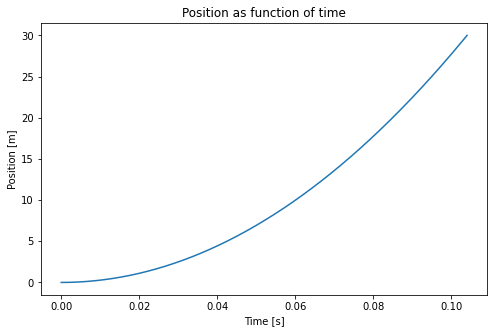

In [12]:
plt.figure(figsize=(8,5))

plt.plot(t, r)
plt.title('Position as function of time')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')

Dette ser fornuftig ut. Posisjonen øker eksponentielt, så det tyder på en akselerasjon.

La oss nå se på hvor mye strøm vi trenger for å nå denne hastigheten på 28 460 m/s. Vi vet at dette vil kreve en god del strøm, så vi skrur opp startstrømmen til 100 kA og sjekker derfra.

In [14]:
v_goal = test_velocity_2 # the goal is set to the velocity we need for a distance 1 km above the ground
v_test = 0
I_new = I * 10 # starting current is I = 100 kAmps

while v_test <= v_goal:
    t, r, v = railgun(l_new, D, w, I_new, m_new, dt)
    v_test = v[-1]
    I_new *= 1.01 # we raise the current 1 % each time

print(f'Parameters used to reach velocity of {v_goal:.3f} m/s:')
print('')
print(f'Rail length \t\t: {l_new:.3f} m')
print(f'Distance between rails \t: {D:.3f} m')
print(f'Width of rails \t\t: {w:.3f} m')
print(f'Current \t\t: {I_new/1.01:.3f} Amps')
print(f'Mass \t\t\t: {m_new:.3} kg')
print(f'Timestep \t\t: {dt:.3e} s')
print(f'Time it took for object to leave the barrel \t: {t[-1]:.3e} s')

Parameters used to reach velocity of 7904.769 m/s:

Rail length 		: 30.000 m
Distance between rails 	: 0.150 m
Width of rails 		: 0.100 m
Current 		: 137494.068 Amps
Mass 			: 0.01 kg
Timestep 		: 1.000e-05 s
Time it took for object to leave the barrel 	: 7.570e-03 s


Dette resultatet er veldig lovende. Vi ser at vi trenger en spenning på $\sim$138 kA. Til sammenlikning klarte noen japanske forskere ved the National Institute for Fusion Science (NIFS) for over 5 år siden å oppnå en strøm på over 100 000 ampere, i følge [www.rt.com](https://www.rt.com/news/175968-japan-highest-electrical-current/). Dette er den høyeste strømmen som har blitt generert på jorda. De trengte en temperatur på -253 grader celsius. Vi skal tross alt bare generere litt over 38 000 ampere mer enn det de klarte. 

### Omskriving av formler

Til nå har vi brut integrasjon til å løse problemet vårt. Nå skal vi se på en annen måte å gjøre det på, som vil gi oss større frihet til å variere de forskjellige parameterne.

Ettersom at krafta fra railgun-en på broen er konstant, vil vi få en konstant akselerasjon gitt ved

\begin{align}
F&=ma\\
a&=\frac{F}{m} \tag{1}
\end{align}

Ved konstant akselerasjon har vi bevegelseslikningen for hastighet. Vi løser for tiden og får

\begin{align}
v&=at\\
t&=\frac{v}{a} \tag{2}
\end{align}

Videre har vi likningen for strekning. Den er

$$s=v_0t+\frac{1}{2}at^2$$

Vi vet at broen starter fra rod, ved $t=0$. Altså er $v_0=0$. Vi får da 

$$s=\frac{1}{2}at^2 \tag{3}$$

Vi setter $(2)$ inn i $(3)$ og får

\begin{align}
s&=\frac{1}{2}a\Big(\frac{v}{a}\Big)^2\\
s&=\frac{v^2}{2a} \tag{4}
\end{align}

Her setter vi $(1)$ inn i $(4)$, som gir

$$s=\frac{mv^2}{2F} \tag{5}$$

Den eneste krafta som virker på broen er den magnetiske krafta $F_b$. $v$ er harstigheten vi ønsker å oppnå for å gå i bane rundt jorda. $m$ er massen, og $s$ er lengden på skinnene. 

Vi setter $v=v_o,F=F_b, s=\ell$ for orbit-hastighet, kraft og lengde på skinnene. Vi får da likningen

\begin{align}
\ell&=\frac{mv_o^2}{2F_b}\\
&=\frac{mv_o^2}{2\frac{\mu_oI^2}{\pi}\ln\Big(\frac{2D}{w}+1\Big)}\\
\pi mv_o^2&=2\mu_0I^2\ln\Big(\frac{2D}{w}+1\Big)\cdot \ell
\end{align}

Her har vi konstantene $\pi, v_o^2, 2\mu_0$, som vi kan samle til én konstant

$$\kappa=\frac{2\mu_0}{\pi v_o^2}$$

Vi sitter nå igjen med formelen

$$m=\kappa I^2\ln\Big(\frac{2D}{w}+1\Big)\cdot \ell \tag{6}$$

In [15]:
# defining kappa
v_o = v_goal
kappa = 2 * mu_0 / (pi * v_o**2) # dimention: [kg/(Amps^2 s)]
print(kappa)

1.2802997695883152e-14


Fra likning $(6)$ ser vi at vi kan variere massen til legemet, lengden og tykkelsen på skinnene, strømmen og avstanden mellom skinnene fritt. La oss starte med å se på noen forskjellige masser.

In [16]:
mass_list = np.linspace(1, 100, 10) # list of masses we want to test for
print(mass_list)

[  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]


Vi starter med å endre avstanden mellom skinnene til $D=0.5\,m$, tykkelsen til $w=0.05\,m$ og lengden til $\ell=60\,m$. La oss se på hvilken strøm vi nå trenger. Likningen blir

$$I=\sqrt{\frac{m}{\kappa\ln\Big(\frac{2D}{w}+1\Big)\cdot \ell}}$$

In [103]:
D = 0.5 # m
w = 0.05 # m
l = 50. # m

def current(m, D, w, l):
    I_list = np.zeros(len(m))
    
    for i in range(len(m)):
        I_list[i] = np.sqrt(m[i] / (kappa * np.log(2*D / w + 1) * l))
    
    return I_list

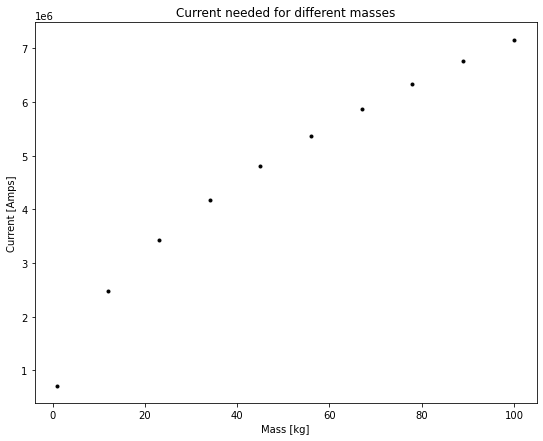

In [104]:
I_list = current(mass_list, D, w, l)

plt.figure(figsize=(9,7))
plt.title('Current needed for different masses')
plt.xlabel('Mass [kg]')
plt.ylabel('Current [Amps]')
plt.plot(mass_list, I_list, 'ok', markersize='3')

In [105]:
print('Current needed:')
print('')
print('Masses[kg]\t Current[kA]')
print('')

for m, i in zip(mass_list, I_list):
    print(f'{m:.0f}\t\t {i/1000:.3f}')

Current needed:

Masses[kg]	 Current[kA]

1		 716.308
12		 2481.362
23		 3435.291
34		 4176.755
45		 4805.138
56		 5360.355
67		 5863.231
78		 6326.258
89		 6757.633
100		 7163.076


Her ser vi at vi fort trenger enormt mye strøm for å få legemet i bane. 78 kg krever over 6 MA, som er 6 millioner ampere. Grunnen til at vi ser på dette er at vi vil undersøke dielektrisk sammenbrudd i lufta mellom skinnene.

### Dielektrisk sammenbrudd

Et materiale som skal hindre at det går strøm igjennom det, kalles en isolator. Alle materialer har noen frie ladningsbærere selv om de har veldig høy resistivitet og er gode isolatorer. Det vil si at dersom tilstrekkelig høy spenning blir påført dem, vil de lede strøm. Når dette skjer blir materialet ionisert, altså blir elektronene revet vekk fra atomkjernen. Gassen er nå blitt plasma, fullt av frie ladningsbærere. Spenningen lades ut ved å sende ladning gjennom plasmaet. 

I vår situasjon kan vi godt tenkes at spenningen blir så høy at vi opplever elektrisk gjennomslag. Til nå har vi ikke tatt motstanden i materialet railgun-en er satt sammen av med i beregningene. For å finne den, kan vi bruke følgende formel:

$$R=\frac{\rho\ell}{A}$$

hvor $A$ er tversnittarealet til materialet, $\rho$ er resistiviteten og $\ell$ er lengden til materialet.

Resistiviteten til noen ulike metaller:

In [106]:
resist_values = np.array([1.72, 7., 10., 22.]) * 1e-8 # resistivity in [ohm * m]
resist_names = np.array(['Copper', 'Brass', 'Iron', 'Led']) # names of metals

In [107]:
A = w**2 # cross section area
def resistance(resistivity, A, l): # same values as before, in addition to cross section area of the rails
    R = resistivity * l / A
    return R

In [108]:
print('Resistances for different metals:')
print('')
print('Metals \t Resistance [ohm]')
print('')
for v, n in zip(resist_values, resist_names):
    R = resistance(v, A, l)
    print(f'{n} \t {R:.2e}')

Resistances for different metals:

Metals 	 Resistance [ohm]

Copper 	 3.44e-04
Brass 	 1.40e-03
Iron 	 2.00e-03
Led 	 4.40e-03


Nå som vi har motstanden for metallet railgun-en består av kan vi anse systemet som en krets.

# figur 3 av kretsen med 3 motstander som blir til en motstand

La oss se på tilfellet med en masse på 78 kg og en railgun bygd av bly.

In [112]:
m = mass_list[7] # 78 kg
I = I_list[7] # ~11 MAmps
metal = resist_names[3] # led
rho = resist_values[3] # resistivity for led
R = 3 * resistance(rho, A, l) # resistance for led

Fra Ohms lov vet vi at vi kan finne spenningen i en krets ved

$$V=RI$$

In [113]:
def voltage(R, I):
    '''Ohm's law'''
    V = R * I
    return V

In [114]:
V = voltage(R, I)
print(V)

83506.60107191207
